In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential



In [2]:
training_data = image_dataset_from_directory(
    '../data/chest_xray/train', 
    labels='inferred',
    validation_split = 0.2,
    subset="training",
    seed=14)

Found 5216 files belonging to 2 classes.
Using 4173 files for training.


In [3]:
validation_data = image_dataset_from_directory(
    '../data/chest_xray/train', 
    labels='inferred',
    validation_split = 0.2,
    subset="validation",
    seed=14)

Found 5216 files belonging to 2 classes.
Using 1043 files for validation.


In [4]:
test_data = image_dataset_from_directory(
    '../data/chest_xray/test', 
    labels='inferred',
    batch_size = 624,
    shuffle = False)

Found 624 files belonging to 2 classes.


In [5]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [6]:
aug_ds = training_data.map( lambda x, y: (data_augmentation(x, training=True), y))
augmented_training_data = training_data.concatenate(aug_ds)

In [7]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [224,224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

In [8]:
augmented_training_data = augmented_training_data.shuffle(1000)
augmented_training_data = augmented_training_data.map(preprocess).prefetch(1)
validation_data = validation_data.map(preprocess).prefetch(1)
test_data = test_data.map(preprocess).prefetch(1)

In [9]:
augmented_training_data

<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

# Baseline - model 3

In [11]:
reconstructed_model = keras.models.load_model("Kyle_transfer_full_3")

In [12]:
reconstructed_model.evaluate(test_data)

1/1 [==============================] - 0s 53ms/step - loss: 0.4171 - accuracy: 0.9135


[0.41713327169418335, 0.9134615659713745]

# (Mod 6) =  Mod 3 -----> Run 1 more epoch, include recall, no augment validation

In [20]:
mod6 = keras.models.load_model("Kyle_transfer_full_3")

In [21]:
optimizer = keras.optimizers.SGD(lr = 0.01, momentum = 0.9, decay = 0.001)
mod6.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy', tf.keras.metrics.Recall()])

In [22]:
results_6 = mod6.fit(augmented_training_data, epochs = 1, validation_data = validation_data, class_weight = {0:2.88, 1:1})

262/262 [==============================] - 2318s 9s/step - loss: 0.0487 - accuracy: 0.9878 - recall_1: 0.9861 - val_loss: 0.0976 - val_accuracy: 0.9722 - val_recall_1: 0.9630


In [23]:
mod6.evaluate(test_data)

1/1 [==============================] - 0s 20ms/step - loss: 0.5684 - accuracy: 0.9038 - recall_1: 0.9897


[0.5684414505958557, 0.9038461446762085, 0.9897435903549194]

In [24]:
mod6.save('Kyle_transfer_full_6')

INFO:tensorflow:Assets written to: Kyle_transfer_full_6/assets


# (Mod 7) = Mod 6 -----> 1 more epoch

In [25]:
mod7 = mod6

In [26]:
results_7 = mod7.fit(augmented_training_data, epochs = 1, validation_data = validation_data, class_weight = {0:2.88, 1:1})

262/262 [==============================] - 2255s 9s/step - loss: 0.0372 - accuracy: 0.9901 - recall_1: 0.9890 - val_loss: 0.2244 - val_accuracy: 0.9559 - val_recall_1: 0.9413


In [27]:
mod7.evaluate(test_data)

1/1 [==============================] - 0s 13ms/step - loss: 0.5081 - accuracy: 0.9119 - recall_1: 0.9821


[0.5081066489219666, 0.9118589758872986, 0.9820512533187866]

In [28]:
mod7.save('Kyle_transfer_full_7')

INFO:tensorflow:Assets written to: Kyle_transfer_full_7/assets


# (Mod 5) = Mod 3 -----> Removing class weights and augmented validation set

In [16]:
optimizer = keras.optimizers.SGD(lr = 0.01, momentum = 0.9, decay = 0.001)
reconstructed_model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy', tf.keras.metrics.Recall()])

In [17]:
results = reconstructed_model.fit(augmented_training_data, epochs = 1, validation_data = validation_data)

262/262 [==============================] - 2409s 9s/step - loss: 0.0217 - accuracy: 0.9923 - recall: 0.9945 - val_loss: 0.0851 - val_accuracy: 0.9751 - val_recall: 0.9681


In [18]:
reconstructed_model.evaluate(test_data)

1/1 [==============================] - 0s 19ms/step - loss: 0.5844 - accuracy: 0.8862 - recall: 0.9949


[0.5843650698661804, 0.8862179517745972, 0.9948717951774597]

In [19]:
reconstructed_model.save('Kyle_transfer_full_5')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Kyle_transfer_full_5/assets


# (Mod 8) = Mod 5 -----> 1 more epoch

In [29]:
mod8 = reconstructed_model

In [30]:
mod8.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy', tf.keras.metrics.Recall()])

In [31]:
results_8 = mod8.fit(augmented_training_data, epochs = 1, validation_data = validation_data)

262/262 [==============================] - 2524s 10s/step - loss: 0.0131 - accuracy: 0.9958 - recall_2: 0.9968 - val_loss: 0.0424 - val_accuracy: 0.9847 - val_recall_2: 0.9898


In [32]:
mod8.evaluate(test_data)

1/1 [==============================] - 0s 25ms/step - loss: 1.3140 - accuracy: 0.8173 - recall_2: 0.9974


[1.313961148262024, 0.817307710647583, 0.9974358677864075]

In [3]:
mod6 = keras.models.load_model("Kyle_transfer_full_6")

In [9]:
mod6.evaluate(test_data)

1/1 [==============================] - 0s 40ms/step - loss: 3462.8213 - accuracy: 0.3750 - recall_1: 0.0000e+00


[3462.8212890625, 0.375, 0.0]

In [10]:
predictions = (mod6.predict(test_data) > 0.5).astype('int32')

In [6]:
image_batch, labels_batch = next(iter(test_data))

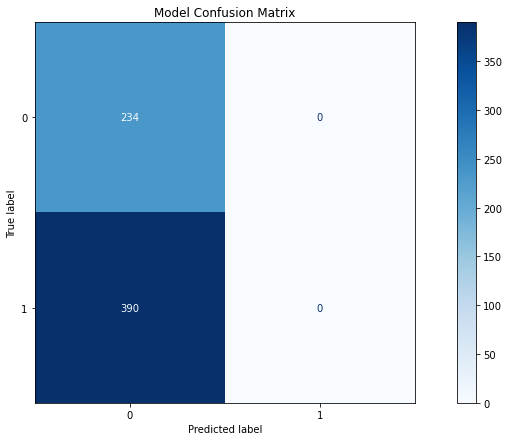

In [11]:
fig, ax = plt.subplots(figsize = (15,7))
ax.set_title('Model Confusion Matrix')

labels = ['Normal','Pneumonia']

cm = confusion_matrix(labels_batch, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues, ax = ax);

In [26]:
test =  tf.keras.models.load_model('Kyle_transfer_full_6')

In [28]:
optimizer = keras.optimizers.SGD(lr = 0.01, momentum = 0.9, decay = 0.001)

test.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy', tf.keras.metrics.Recall()])

In [29]:
#test.evaluate(test_data)

test.evaluate(test_data)

1/1 [==============================] - 0s 23ms/step - loss: 3462.8213 - accuracy: 0.3750 - recall: 0.0000e+00


[3462.8212890625, 0.375, 0.0]